# Regression Model

In [29]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from data_cleaning import clean_car_data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Import the Data
cars_raw = pd.read_csv("USA_cars_datasets.csv")

In [3]:
# Clean the data
cars = clean_car_data(cars_raw)

In [4]:
# One-hot Encoding for categorical variables

# Determine categorical columns
category_columns = cars.select_dtypes('category').columns

# Drop categorical columns
cars = pd.get_dummies(cars, columns=category_columns, drop_first=True)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 745 entries, 9 to 2203
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             745 non-null    int64
 1   mileage           745 non-null    int64
 2   age               745 non-null    int64
 3   is_f-150          745 non-null    int64
 4   color_blue        745 non-null    bool 
 5   color_gray        745 non-null    bool 
 6   color_off-white   745 non-null    bool 
 7   color_other       745 non-null    bool 
 8   color_red         745 non-null    bool 
 9   color_silver      745 non-null    bool 
 10  color_white       745 non-null    bool 
 11  region_Northeast  745 non-null    bool 
 12  region_South      745 non-null    bool 
 13  region_West       745 non-null    bool 
dtypes: bool(10), int64(4)
memory usage: 36.4 KB


In [6]:
# Separate the features and target variable
x = cars.drop(columns='price')
y = cars['price']

In [7]:
# Standardize the numeric variables
scaler = MinMaxScaler()

# Identify numeric columns
number_columns = x.select_dtypes('number').columns

# Standardize numeric features
x[number_columns] = scaler.fit_transform(cars[number_columns])

In [8]:
# Partition the Data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [9]:
# Make a Regression Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
# Predict values using the model
pred = model.predict(x_train)

In [11]:
# Calculate model metrics
coefficients = model.coef_
intercept = model.intercept_

# Print intercept
print("Intercept:", intercept)

Intercept: 35968.17791760726


In [12]:
# Create a coefficient table
coef_table = pd.DataFrame({"Coefficient": coefficients}, index=x.columns)
coef_table

,Coefficient
mileage,-12727.271494
age,-19322.967653
is_f-150,1123.478403
color_blue,-1722.475093
color_gray,-4539.654439
color_off-white,1672.448957
color_other,-2017.103434
color_red,-4415.254704
color_silver,-6964.419820
color_white,-4188.232163


In [41]:
# Sort the table by coefficients to evaluate which variables are changing most significantly
sort_df = coef_table
sort_df['Absolute_Value_Coef'] = sort_df['Coefficient'].abs()
sort_df = sort_df.sort_values(by="Absolute_Value_Coef", ascending=False)
sort_df = sort_df.drop(columns='Absolute_Value_Coef')
sort_df

,Coefficient
age,-19322.967653
mileage,-12727.271494
color_silver,-6964.419820
color_gray,-4539.654439
color_red,-4415.254704
color_white,-4188.232163
region_South,-2186.939664
color_other,-2017.103434
color_blue,-1722.475093
color_off-white,1672.448957


This table is sorted by coefficient values as absolute values. The greater coefficients indicate how much the dependent variable (price) changes given the change in a single unit of the feature.

In [19]:
# Predict on the test data
pred_test = model.predict(x_test)

In [25]:
# Evaluate how well the model scores
r2 = r2_score(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
rmse = mse ** 0.5

# Print scores
print("R2 Score:", round(r2, 3))
print("RMSE:", round(rmse, 3))

R2 Score: 0.156
RMSE: 10299.336


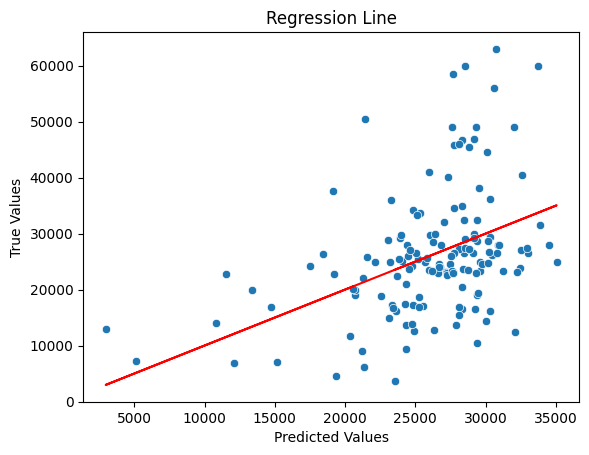

In [32]:
# Plot the regression line
sns.scatterplot(x=pred_test, y=y_test)
plt.plot(pred_test, pred_test, color='red')
plt.title("Regression Line")
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

Text(0.5, 0, 'Residuals')

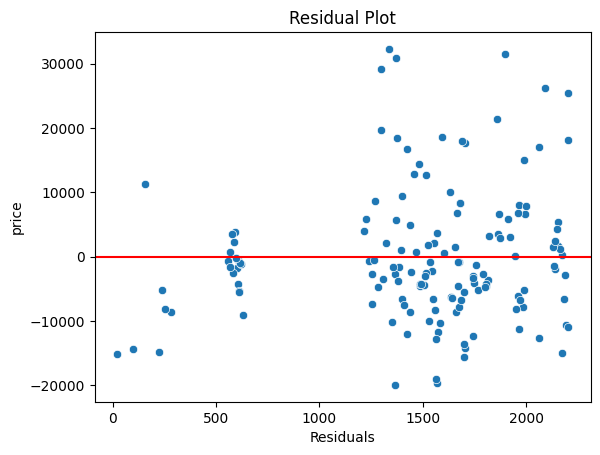

In [37]:
# Calculate residuals
residuals = y_test - pred_test

# Make a plot of the residuals
sns.scatterplot(residuals)
plt.axhline(0, color='red')
plt.title("Residual Plot")
plt.xlabel("Residuals")

There are no clear trends in the residual plot, but it appears in the scatterplot above with the regression line that it may be more useful to implement polynomial regression.